# **世界とくらべる日本の災害と前回のリベンジ** 
粟野翔

前回のリベンジをします。今度こそ意味のあるネットワークマップをつくります。  
その前にチャレンジ課題を終わらせます！


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0




### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。



# **国ごとにどんな災害の特色があるの？**  
日本はいろんな災害が起こる災害大国ですが、地震が多かったり、台風が頻繁に来たりと特色はありますよね？世界には地震が起こりにくい国もあるようです。それらの違いを比べてみたいと思います！  

比べる国

・**日本** (JPN)  
・**アメリカ** (USA)  
・**オーストラリア** (AUS)  
・**イギリス** (GBR)  
・**コンゴ** (COD)  


この5か国を選んだ理由はいろんな地域の特色を見たいからです

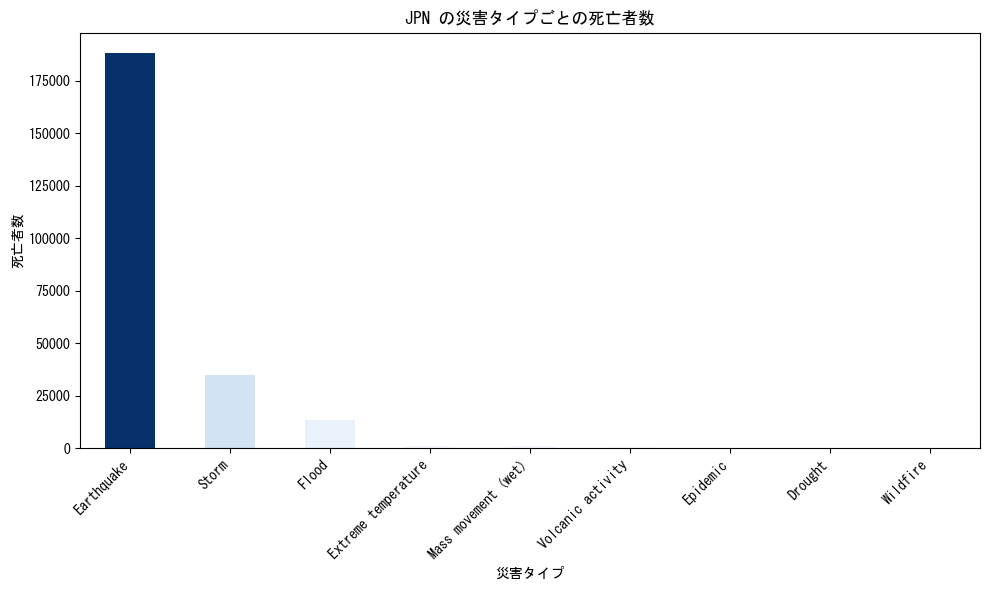

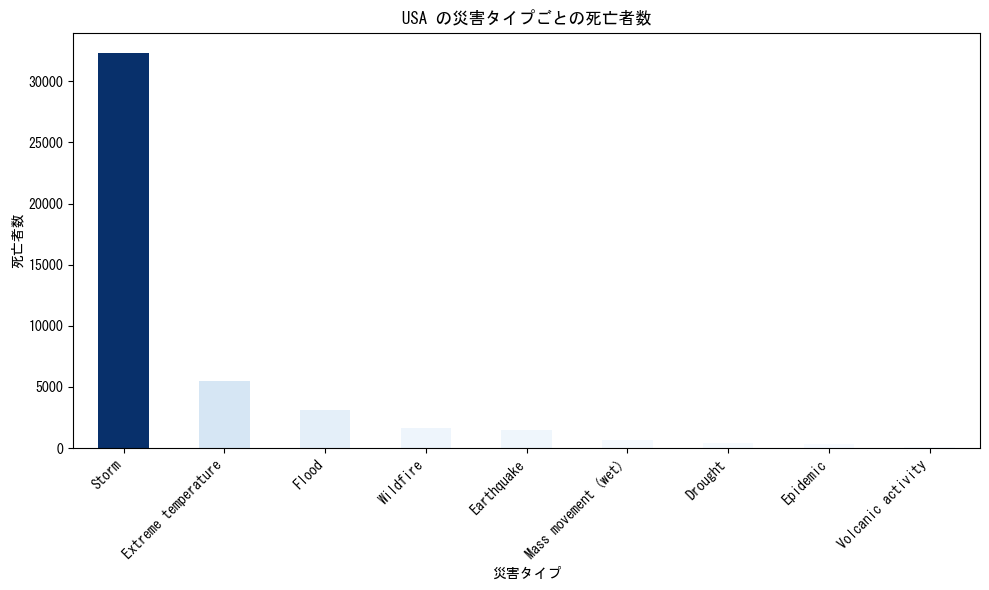

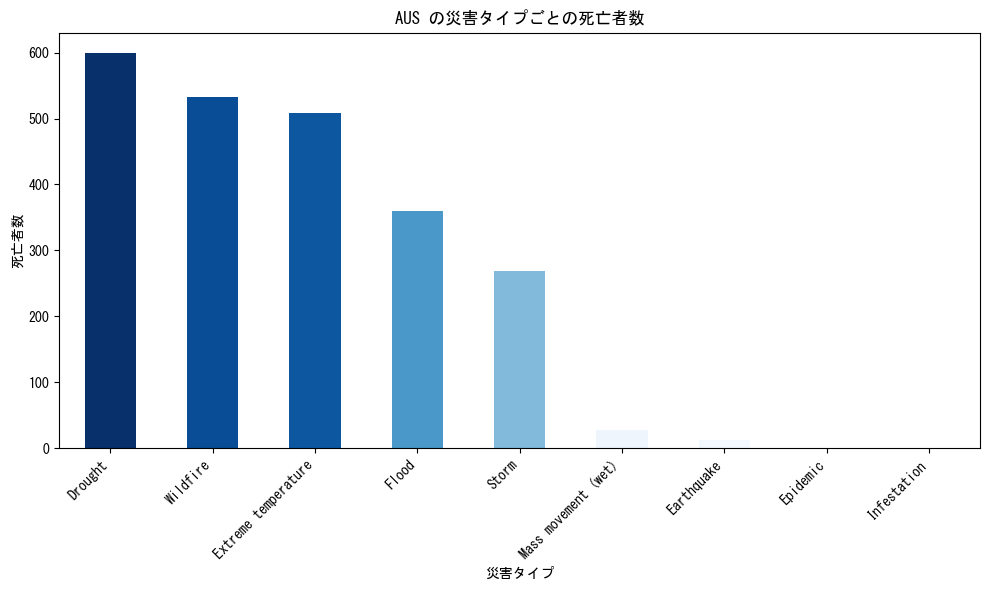

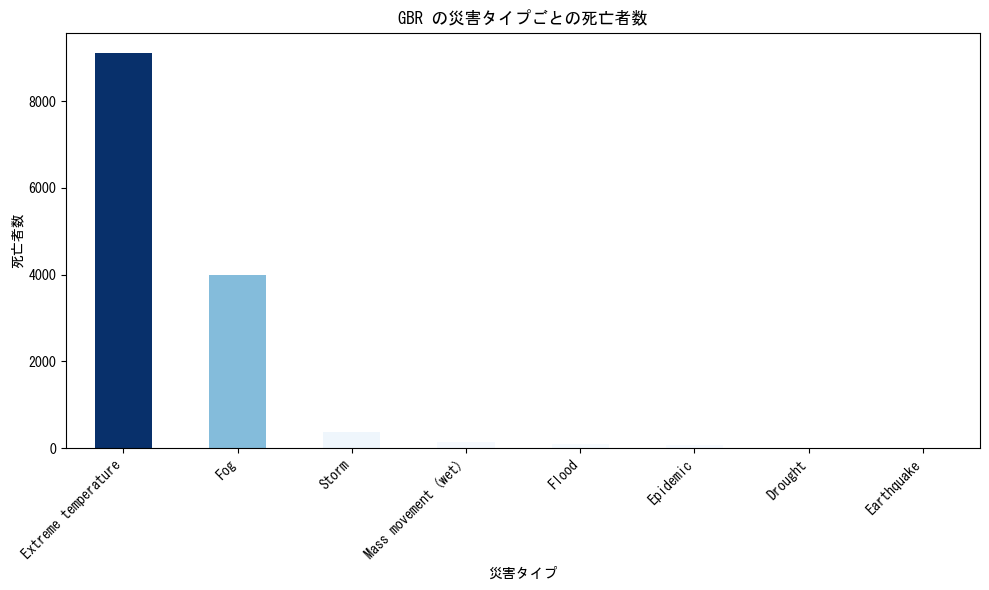

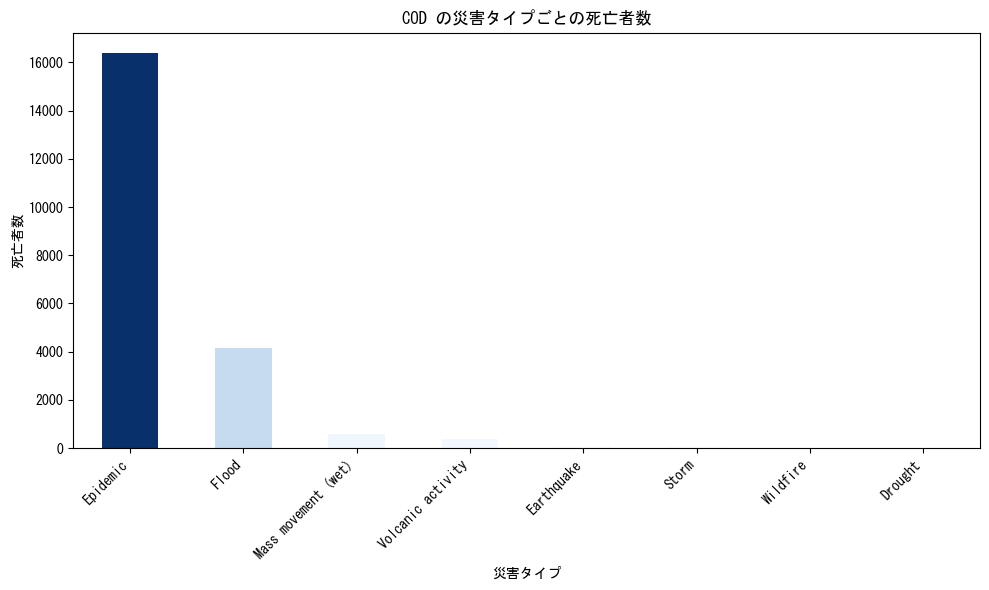

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語対応

def plot_multiple_countries_disaster_deaths_gradient(csv_file, iso_codes):
    """
    複数の国の災害タイプごとの死亡者数を棒グラフで表示し、
    最大値を濃い青にしたグラデーションカラーを適用
    
    Parameters:
    csv_file: str - 災害データCSVファイル
    iso_codes: list - ISO国コードのリスト
    """
    df = pd.read_csv(csv_file)
    
    for iso in iso_codes:
        country_df = df[df['ISO'] == iso]
        
        if country_df.empty:
            print(f"{iso} のデータが見つかりません")
            continue
        
        deaths_by_type = country_df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
        
        # グラデーションカラー作成
        norm = mcolors.Normalize(vmin=deaths_by_type.min(), vmax=deaths_by_type.max())
        cmap = plt.cm.Blues  # 青系カラーマップ
        colors = [cmap(norm(value)) for value in deaths_by_type]
        
        # 棒グラフ作成
        plt.figure(figsize=(10,6))
        deaths_by_type.plot(kind='bar', color=colors)
        plt.title(f"{iso} の災害タイプごとの死亡者数")
        plt.xlabel("災害タイプ")
        plt.ylabel("死亡者数")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# 使用例
csv_file = "emdat.csv"
iso_codes = ['JPN', 'USA', 'AUS', 'GBR', 'COD']
plot_multiple_countries_disaster_deaths_gradient(csv_file, iso_codes)


これX軸をすべて別々でつくっているので単純な数ではなく比率で見てもらいたいです。  

日本はもっとばらけると思ったのですが地震の被害が圧倒的でした。  
個人的に注目したいのはイギリスで、1位が「極端な気温」2位が「霧」です。 ロンドンの霧は有名ですがこんなにも人の命をうばているのだと思いました。https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%B3%E3%83%89%E3%83%B3%E3%82%B9%E3%83%A2%E3%83%83%E3%82%B0  
ほとんどの国は1位以外の死亡者数が少ないですがオーストラリアは災害の種類が多いです。対策するものが多いのは大変です…

# **アメリカと日本を比べよう**  
日本の災害とアメリカの災害はそれぞれどんな特色があり、違いはあるのでしょうか？

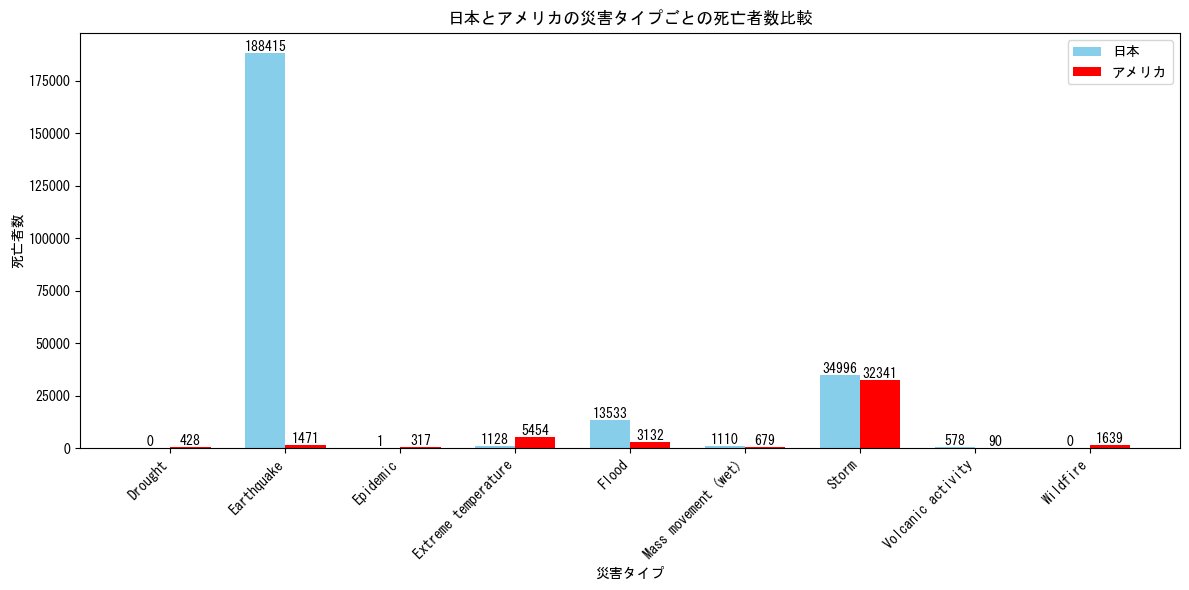

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語対応

def compare_jpn_usa_disaster_deaths_with_labels(csv_file):
    """
    日本(JPN)とアメリカ(USA)の災害タイプごとの死亡者数を比較し、
    棒の上に数値を表示する関数
    """
    df = pd.read_csv(csv_file)
    
    # 国ごとのデータ
    df_jpn = df[df['ISO'] == 'JPN'].groupby('Disaster Type')['Total Deaths'].sum()
    df_usa = df[df['ISO'] == 'USA'].groupby('Disaster Type')['Total Deaths'].sum()
    
    # 災害タイプの統合
    all_disasters = sorted(set(df_jpn.index) | set(df_usa.index))
    df_jpn = df_jpn.reindex(all_disasters, fill_value=0)
    df_usa = df_usa.reindex(all_disasters, fill_value=0)
    
    # 棒グラフ作成
    x = np.arange(len(all_disasters))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12,6))
    bars_jpn = ax.bar(x - width/2, df_jpn.values, width, label='日本', color='skyblue')
    bars_usa = ax.bar(x + width/2, df_usa.values, width, label='アメリカ', color='red')
    
    # 棒の上に数値を表示
    for bar in bars_jpn:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', va='bottom')
        
    for bar in bars_usa:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', va='bottom')
    
    ax.set_xlabel("災害タイプ")
    ax.set_ylabel("死亡者数")
    ax.set_title("日本とアメリカの災害タイプごとの死亡者数比較")
    ax.set_xticks(x)
    ax.set_xticklabels(all_disasters, rotation=45, ha='right')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# 使用例
csv_file = "emdat.csv"
compare_jpn_usa_disaster_deaths_with_labels(csv_file)


地震での死亡者数は日本が圧倒的に多い。  
どちらの国も台風による被害が大きい

【死者数トップ10の災害】
           Country  Start Year Disaster Type  Total Deaths
287          China        1931         Flood     3700000.0
255          China        1928       Drought     3000000.0
134   Soviet Union        1917      Epidemic     2500000.0
155          India        1920      Epidemic     2000000.0
847          China        1959         Flood     2000000.0
457     Bangladesh        1943       Drought     1900000.0
1147         India        1965       Drought     1500000.0
441          India        1942       Drought     1500000.0
60           China        1909      Epidemic     1500000.0
54           India        1907      Epidemic     1300000.0


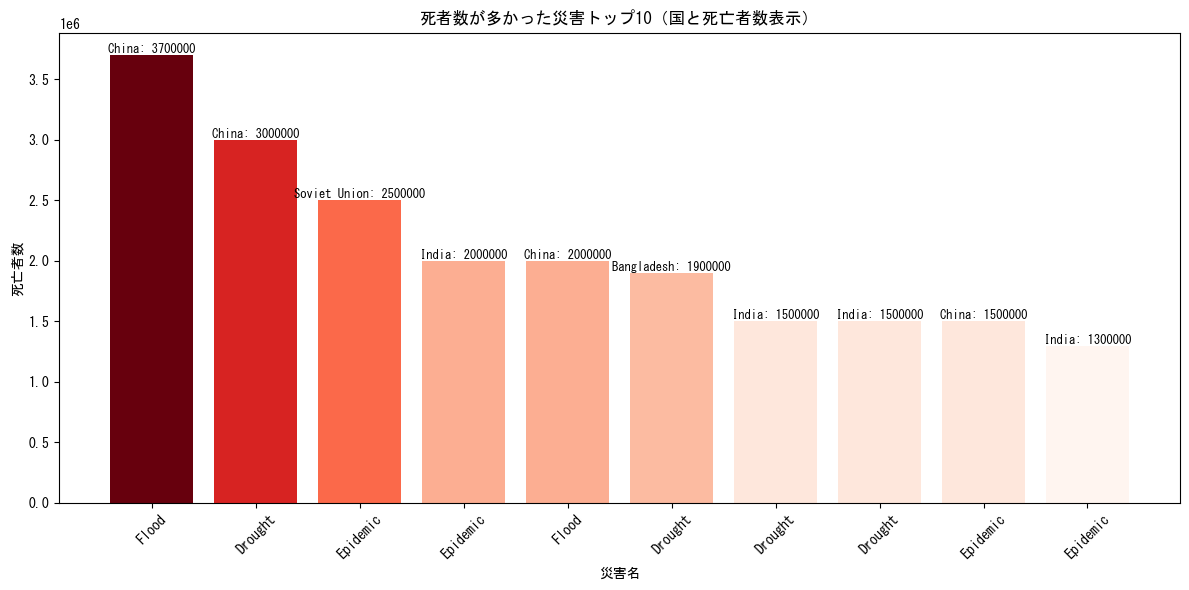

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 死者数トップ10
df_deaths = df[df["Total Deaths"].notnull()]
deaths_top = df_deaths.sort_values("Total Deaths", ascending=False).head(10)

print("【死者数トップ10の災害】")
print(deaths_top[["Country", "Start Year", "Disaster Type", "Total Deaths"]])

# 赤のグラデーションカラーを作成
norm = mcolors.Normalize(vmin=deaths_top["Total Deaths"].min(), vmax=deaths_top["Total Deaths"].max())
cmap = plt.cm.Reds
colors = [cmap(norm(val)) for val in deaths_top["Total Deaths"]]

plt.figure(figsize=(12,6))
bars = plt.bar(range(10), deaths_top["Total Deaths"], color=colors)

# 棒の上に「国名: 死者数」を表示
for bar, country, deaths in zip(bars, deaths_top["Country"], deaths_top["Total Deaths"]):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 50,  # 棒の上に少し余白
        f"{country}: {int(deaths)}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# 災害名をX軸ラベルに
plt.xticks(range(10), deaths_top["Disaster Type"], rotation=45)
plt.title("死者数が多かった災害トップ10（国と死亡者数表示）")
plt.xlabel("災害名")
plt.ylabel("死亡者数")

plt.tight_layout()
plt.show()


洪水、伝染病、干ばつが多くの命を奪っています。またアジアでこれらが多く起こっていることが分かります。 

# **ここ数年の日本のトレンド**

C:\Users\gtbao\AppData\Local\Temp\ipykernel_9940\585306327.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



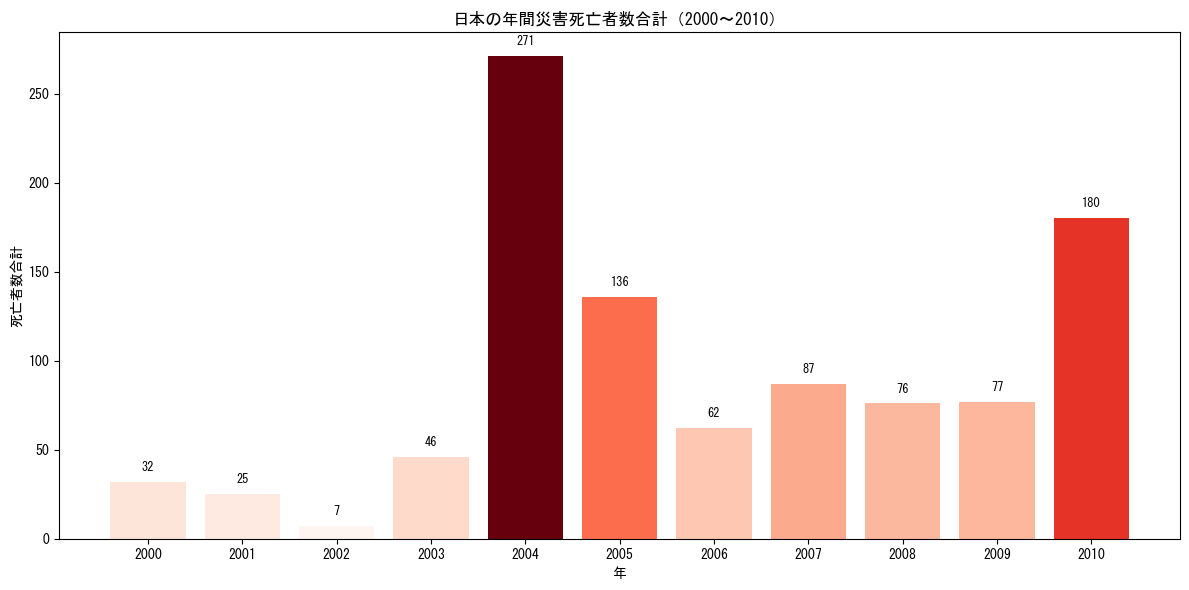

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語フォント

def plot_japan_yearly_total_deaths(csv_file, start_year, end_year):
    """
    日本の年ごとの総死亡者数を1本の棒として表示。
    start_year 〜 end_year の年数分だけ棒を表示する。
    """
    df = pd.read_csv(csv_file)
    
    # 日本に絞る
    df_jpn = df[(df["ISO"] == "JPN") & 
                (df["Start Year"] >= start_year) & 
                (df["Start Year"] <= end_year)]
    
    # Total Deaths の NaN を 0 に
    df_jpn["Total Deaths"] = df_jpn["Total Deaths"].fillna(0)

    # 年ごとに合計
    year_sum = df_jpn.groupby("Start Year")["Total Deaths"].sum()

    # 抜けている年は0にする
    all_years = pd.Series(index=range(start_year, end_year+1), dtype=float)
    year_sum = all_years.fillna(0).add(year_sum, fill_value=0)

    # 赤のグラデーション
    norm = mcolors.Normalize(vmin=year_sum.min(), vmax=year_sum.max())
    cmap = plt.cm.Reds
    colors = [cmap(norm(val)) for val in year_sum]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(
        year_sum.index,
        year_sum.values,
        color=colors
    )

    # 棒の上に死亡者数ラベル
    for bar, deaths in zip(bars, year_sum.values):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5,
            f"{int(deaths)}",
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.title(f"日本の年間災害死亡者数合計（{start_year}〜{end_year}）")
    plt.xlabel("年")
    plt.ylabel("死亡者数合計")
    plt.xticks(range(start_year, end_year+1))
    plt.tight_layout()
    plt.show()


# 使用例
csv_file = "emdat.csv"
plot_japan_yearly_total_deaths(csv_file, 2000, 2010)


2004年の死亡者数が多いのですが何があったのでしょうか？  
調べてみると新潟県中越地震があったり、台風が10個も上陸したとのことです。  
2010年は奄美大島集中豪雨、九州南部豪雨などの豪雨による被害が大部分を占めました。

参考文献  
https://www.mlit.go.jp/river/pamphlet_jirei/bousai/saigai/2005/50.pdf  
https://www.sci.kagoshima-u.ac.jp/oyo/advanced/disaster/amami2010.html#:~:text=2010%E5%B9%B410%E6%9C%8818,%E5%80%A4%E3%82%92%E8%A8%98%E9%8C%B2%E3%81%97%E3%81%BE%E3%81%97%E3%81%9F%E3%80%82

## **†Requiem†**

先週の私が遺した宿題を終わらせましょう…  
  
私が前回本当にしたかったことは「ネットワーク図をもちいて災害同士にはどんな関係があるのかを分析する」です。前回は  

円…災害のサブタイプ  
線…一緒に出た回数  
線の太さ…共起回数が多いほど太い  
円の大きさ…その災害の総登場回数  
線の色…相関の強さ  
  
    
で分析しました。

まずなにが悪かったのか分析しないと修正できません。  
前回と同じマップを作ります。

ネットワーク図を保存しました: subtype_cooccurrence_network.png


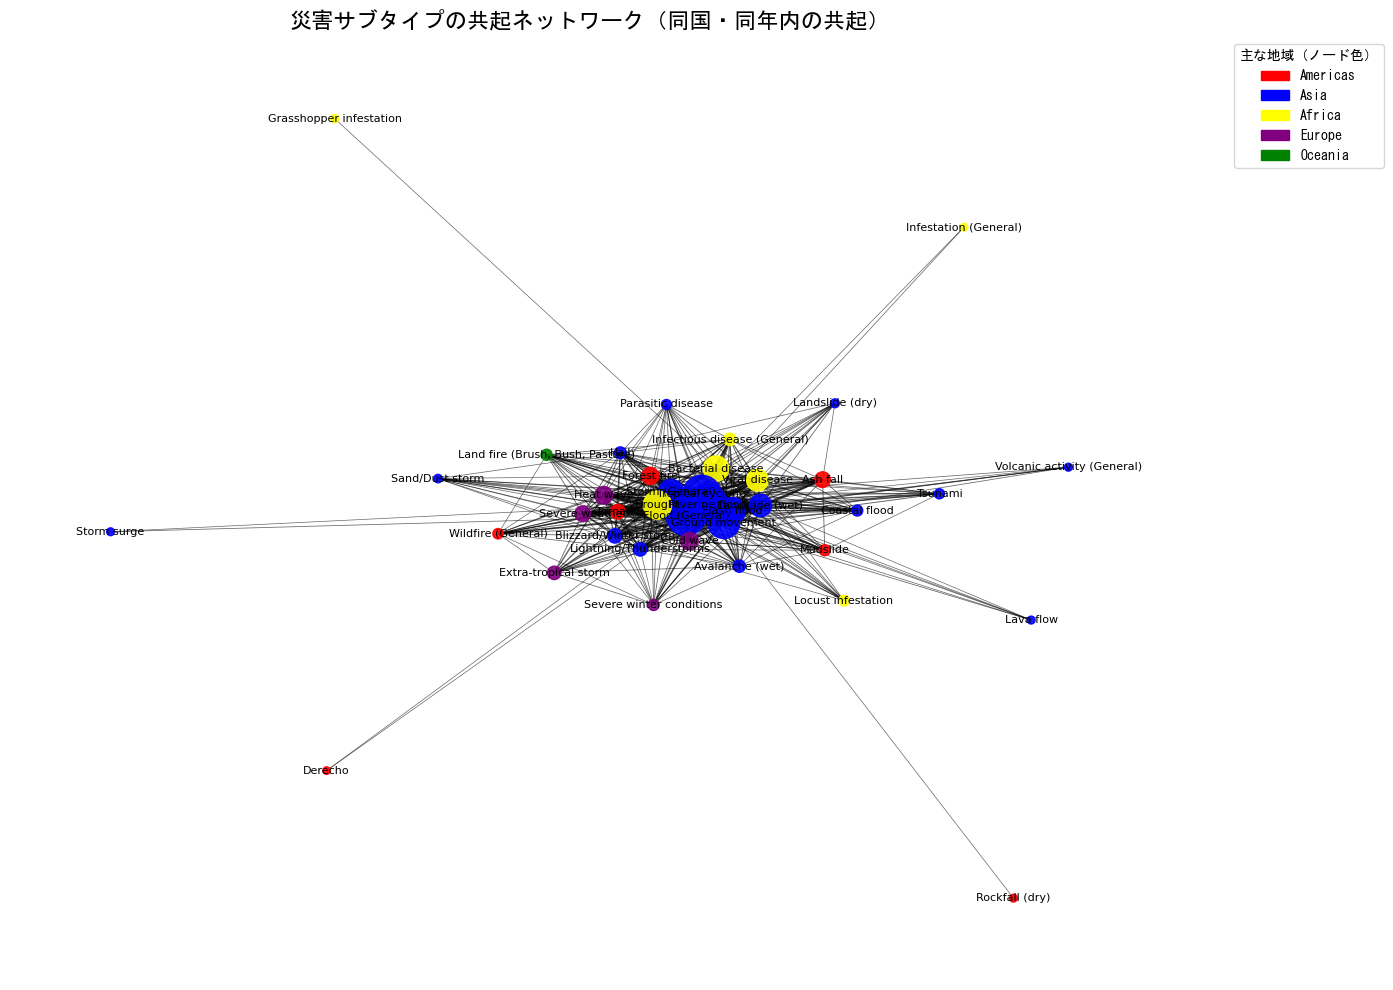


上位の共起ペア（weightでソート）:
        subtype_a        subtype_b  weight
   Riverine flood Tropical cyclone     338
  Flood (General) Tropical cyclone     337
  Ground movement   Riverine flood     279
  Flood (General)  Ground movement     265
  Flood (General)   Riverine flood     256
      Flash flood   Riverine flood     236
      Flash flood  Flood (General)     225
  Ground movement Tropical cyclone     221
Bacterial disease   Riverine flood     218
          Drought   Riverine flood     208
  Flood (General)  Landslide (wet)     189
   Riverine flood  Storm (General)     177
  Storm (General) Tropical cyclone     177
          Drought  Flood (General)     177
  Flood (General)  Storm (General)     176
  Landslide (wet)   Riverine flood     174
   Riverine flood    Viral disease     164
      Flash flood Tropical cyclone     159
  Ground movement  Landslide (wet)     154
          Drought Tropical cyclone     152

上位ノード（サブタイプ）:
Riverine flood: 1618
Flood (General): 1614
Tropical cyclone:

In [65]:
# 災害サブタイプ共起ネットワーク（フル）
# VSCodeでそのまま実行できます
# 必要パッケージ: pandas, networkx, matplotlib
# インストール: pip install pandas networkx matplotlib

import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語フォント

# -----------------------
# 設定（必要ならここを変更）
# -----------------------
CSV_PATH = "emdat.csv"
GROUP_BY = "Country"     # 同時発生の単位: "Country" または "Region"
YEAR_COL = "Start Year"  # 年列名
SUBTYPE_COL = "Disaster Subtype"  # サブタイプ列名（無ければ "Disaster Type" に変更）
REGION_COL = "Region"    # 地域列名
MIN_EDGE_WEIGHT = 3      # この回数未満の共起は描画しない（雑音除去）
TOP_N_NODES = 40         # 描画する上位ノード数（Noneで制限なし）
OUTPUT_PNG = "subtype_cooccurrence_network.png"
# -----------------------

# 読み込み
df = pd.read_csv(CSV_PATH)

# サブタイプの存在チェック（無ければ Disaster Type を使う）
if SUBTYPE_COL not in df.columns or df[SUBTYPE_COL].isnull().all():
    print(f"注意: 列 {SUBTYPE_COL} が見つからないか空です。Disaster Type を代わりに使用します。")
    SUBTYPE_COL = "Disaster Type"

# 必要な列だけ抽出し NA を除去
df_use = df[[GROUP_BY, YEAR_COL, SUBTYPE_COL, REGION_COL, "Total Deaths"]].dropna(subset=[GROUP_BY, YEAR_COL, SUBTYPE_COL])

# 年は整数に（文字列の場合対応）
df_use[YEAR_COL] = df_use[YEAR_COL].astype(int)

# -----------------------
# 1) 共起ペアのカウント（国×年ごとに同時に出現したサブタイプの全ペアを集計）
# -----------------------
from collections import Counter, defaultdict

edge_counter = Counter()
node_counter = Counter()            # 各サブタイプの出現回数
node_region_counter = defaultdict(Counter)  # 各サブタイプがどの地域で多いか数える

# グルーピング単位: country + year（または region+year に変更可能）
group_keys = [GROUP_BY, YEAR_COL]

for _, group in df_use.groupby(group_keys):
    # 同じ国・同年に出たサブタイプのユニーク集合
    subtypes = sorted(group[SUBTYPE_COL].unique())
    # ノード出現数を更新（同グループ内の1 出現を1カウントとする）
    for s in subtypes:
        node_counter[s] += 1
        # そのサブタイプの出現している地域をカウント（最終的に最頻地域を色分けに使う）
        # group は同じ国・年のレコードの集合。region は複数ある場合があるので最も多い1つを選ぶ。
        # ここでは group の REGION_COL 値の最頻値を取る:
        try:
            most_common_region = group[REGION_COL].mode().iloc[0]
        except Exception:
            most_common_region = "Unknown"
        node_region_counter[s][most_common_region] += 1

    # 全てのペアを作り、edge_counter を増加
    for a, b in itertools.combinations(subtypes, 2):
        if a == b:
            continue
        # 順序を揃えてキー化
        key = tuple(sorted((a, b)))
        edge_counter[key] += 1

# -----------------------
# 2) ノード・エッジの DataFrame 化・フィルタリング
# -----------------------
# エッジを DataFrame に
edges_df = pd.DataFrame(
    [(a, b, w) for (a, b), w in edge_counter.items()],
    columns=["subtype_a", "subtype_b", "weight"]
)

# 閾値でフィルタ（雑音除去）
edges_df = edges_df[edges_df["weight"] >= MIN_EDGE_WEIGHT]

# ノードリストを得る（エッジに出現するノードのみ）
nodes_from_edges = set(edges_df["subtype_a"]).union(set(edges_df["subtype_b"]))

# もし TOP_N_NODES が指定されていれば、node_counter の上位 N を使い、edges も絞る
if TOP_N_NODES is not None:
    top_nodes = set([n for n, _ in node_counter.most_common(TOP_N_NODES)])
    # ノードが top_nodes に含まれるエッジだけ残す
    edges_df = edges_df[edges_df["subtype_a"].isin(top_nodes) & edges_df["subtype_b"].isin(top_nodes)]
    nodes_from_edges = set(edges_df["subtype_a"]).union(set(edges_df["subtype_b"]))

# 最終ノード一覧と出現数（ノードサイズ用）
final_nodes = list(nodes_from_edges)
node_sizes = {n: node_counter.get(n, 1) for n in final_nodes}

# ノードの代表地域（最頻地域）を決定
node_main_region = {}
for n in final_nodes:
    if node_region_counter[n]:
        main_region = node_region_counter[n].most_common(1)[0][0]
    else:
        main_region = "Unknown"
    node_main_region[n] = main_region

# -----------------------
# 3) カラー設定（地域ごと）
# -----------------------
region_color_map = {
    "Americas": "red",
    "Asia": "blue",
    "Africa": "yellow",
    "Europe": "purple",
    "Oceania": "green",
    # データによって表記ゆれがある場合に備えて少し拡張
    "America": "red",
    "North America": "red",
    "South America": "red",
    "Unknown": "gray"
}

# ノード色配列を作成
node_colors = []
for n in final_nodes:
    region = node_main_region.get(n, "Unknown")
    color = region_color_map.get(region, "gray")
    node_colors.append(color)

# -----------------------
# 4) ネットワーク作成（NetworkX）
# -----------------------
G = nx.Graph()
# ノード追加（size属性・region属性）
for n in final_nodes:
    G.add_node(n, size=node_sizes.get(n, 1), region=node_main_region.get(n, "Unknown"))

# エッジ追加（weight属性）
for _, row in edges_df.iterrows():
    a, b, w = row["subtype_a"], row["subtype_b"], row["weight"]
    if a in final_nodes and b in final_nodes:
        G.add_edge(a, b, weight=w)

# -----------------------
# 5) 描画（レイアウト・サイズスケール・ラベル）
# -----------------------
plt.figure(figsize=(14, 10))
# レイアウト：力学レイアウト（見栄えが良い）
pos = nx.spring_layout(G, k=0.5, seed=42)  # k を変えると広がりが変わる

# ノードサイズのスケーリング（見やすさ調整）
sizes = [G.nodes[n]['size'] for n in G.nodes()]
# サイズのスケールを調整（最小30〜最大800）
min_size, max_size = 30, 800
s_min, s_max = min(sizes), max(sizes)
if s_min == s_max:
    node_draw_sizes = [ (min_size + max_size)/2 ] * len(sizes)
else:
    node_draw_sizes = [min_size + ( (s - s_min)/(s_max - s_min) ) * (max_size - min_size) for s in sizes]

# エッジ幅は重みに比例（視覚化のためスケール調整）
edge_weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
if edge_weights:
    e_min, e_max = min(edge_weights), max(edge_weights)
    # 幅は 0.5 〜 6 の範囲
    if e_min == e_max:
        edge_widths = [2.0]*len(edge_weights)
    else:
        edge_widths = [0.5 + ( (w - e_min)/(e_max - e_min) ) * 5.5 for w in edge_weights]
else:
    edge_widths = []

# ノードを色で描画
nx.draw_networkx_nodes(G, pos,
                       node_size=node_draw_sizes,
                       node_color=node_colors,
                       alpha=0.9)

# エッジを描画
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)

# ラベル（ノード名）を描画（重なりを避けるためフォントサイズを小さめに）
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("災害サブタイプの共起ネットワーク（同国・同年内の共起）", fontsize=16)

# 右側に地域の凡例を手動で作る
import matplotlib.patches as mpatches
legend_handles = []
seen_regions = set(node_main_region.values())
for r, c in region_color_map.items():
    if r in seen_regions:
        legend_handles.append(mpatches.Patch(color=c, label=r))
# ソートして凡例表示（表示したい地域だけ）
plt.legend(handles=legend_handles, title="主な地域（ノード色）", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('off')
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=300)
print(f"ネットワーク図を保存しました: {OUTPUT_PNG}")
plt.show()

# -----------------------
# 6) 補助情報の出力（テーブル）
# -----------------------
# 上位の共起ペアを出力
print("\n上位の共起ペア（weightでソート）:")
print(edges_df.sort_values("weight", ascending=False).head(20).to_string(index=False))

# 上位ノード（出現数）
print("\n上位ノード（サブタイプ）:")
for n, cnt in node_counter.most_common(30):
    print(f"{n}: {cnt}")


# **反省点**  
  
  
・文字が小さくどの災害が起こっているのかわからない  
・円の大きさで重みを表したのがわかりにくい  
・地域ごとに色分けしているが、災害同士の関係を調べるうえで地域を分ける必要は薄いのではないか  


これらを解決するために  

・災害の種類を色で分け、視覚的にわかりやすくする  
・円の大きさは固定する  
・データを絞るためにアジアに限定する 


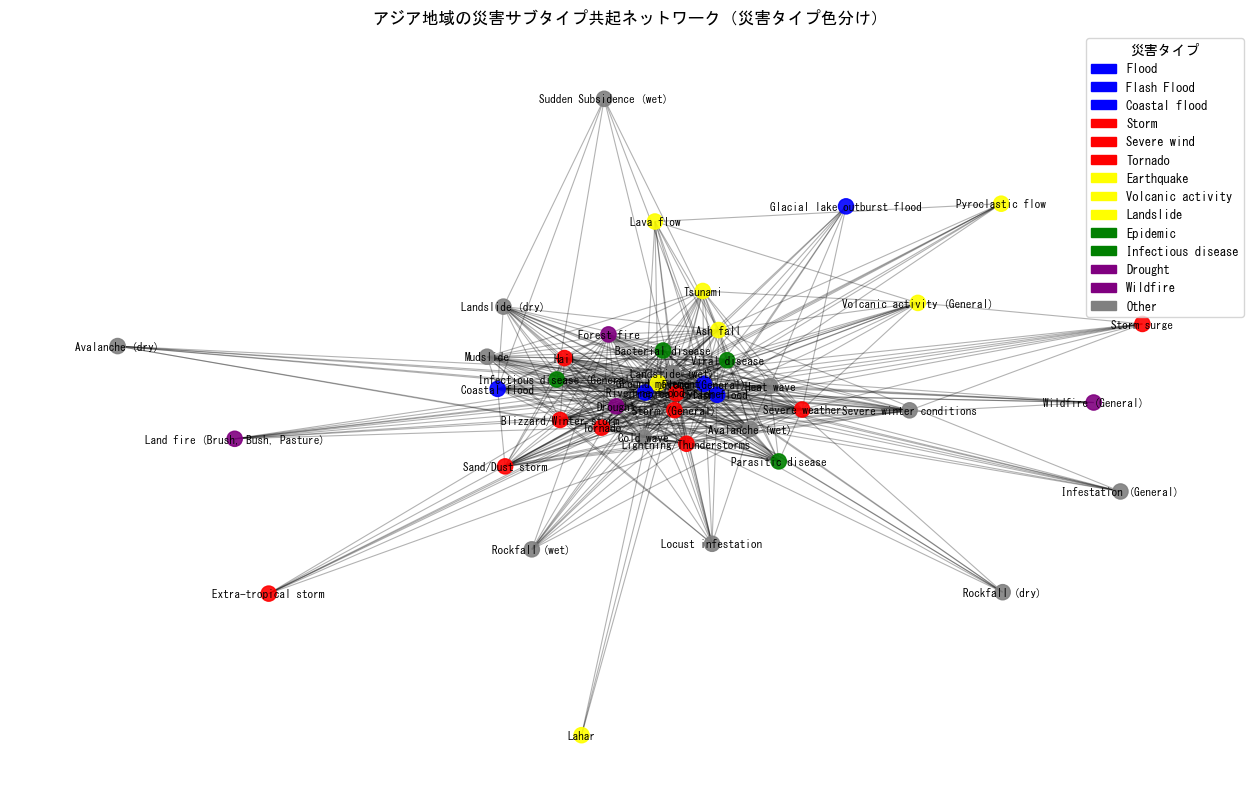

In [67]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("emdat.csv")

# 必要列を整理
df_sub = df[["Disaster Subgroup", "Disaster Type", "Disaster Subtype",
             "Country", "Region", "Start Year"]].dropna()

# ★★ アジアだけ抽出 ★★
df_asia = df_sub[df_sub["Region"] == "Asia"].copy()
df_asia["Disaster Subtype"] = df_asia["Disaster Subtype"].str.strip()

# 災害タイプごとの色設定
type_colors = {
    "Flood": "blue",
    "Flash Flood": "blue",
    "Coastal flood": "blue",
    
    "Storm": "red",
    "Severe wind": "red",
    "Tornado": "red",
    
    "Earthquake": "yellow",
    "Volcanic activity": "yellow",
    "Landslide": "yellow",

    "Epidemic": "green",
    "Infectious disease": "green",

    "Drought": "purple",
    "Wildfire": "purple",

    # その他の災害
    "Other": "gray"
}

# 災害タイプをざっくり分類する関数
def classify_type(disaster_type):
    for key in type_colors.keys():
        if key.lower() in disaster_type.lower():
            return key
    return "Other"

# タイプ分類
df_asia["TypeClass"] = df_asia["Disaster Type"].apply(classify_type)

# ネットワーク生成
G = nx.Graph()

for (country, year), group in df_asia.groupby(["Country", "Start Year"]):
    events = list(group["Disaster Subtype"].unique())
    types = {st: group[group["Disaster Subtype"] == st]["TypeClass"].iloc[0] 
             for st in events}

    for i in range(len(events)):
        for j in range(i + 1, len(events)):
            e1, e2 = events[i], events[j]

            # エッジ重み
            if G.has_edge(e1, e2):
                G[e1][e2]["weight"] += 1
            else:
                G.add_edge(e1, e2, weight=1)

            # ノードにタイプ情報を持たせる
            if "type" not in G.nodes[e1]:
                G.nodes[e1]["type"] = types[e1]
            if "type" not in G.nodes[e2]:
                G.nodes[e2]["type"] = types[e2]

# レイアウト（距離だけで関係性読み取り）
pos = nx.spring_layout(G, k=0.4, seed=42)

# ノードカラー（災害タイプ）
colors = [
    type_colors.get(G.nodes[node]["type"], "gray")
    for node in G.nodes()
]

# ノードサイズ一律
node_size = 120

# 描画
plt.figure(figsize=(16, 10))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.8)

nx.draw_networkx_nodes(
    G, pos,
    node_color=colors,
    node_size=node_size,
    alpha=0.9
)

nx.draw_networkx_labels(G, pos, font_size=8, font_family="MS Gothic")

plt.title("アジア地域の災害サブタイプ共起ネットワーク（災害タイプ色分け）", fontfamily="MS Gothic")

# 伝説（凡例）
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=type_colors[t], label=t) for t in type_colors]
plt.legend(handles=legend_patches, title="災害タイプ", fontsize=9)

plt.axis("off")
plt.show()


すこしは分析しやすくなったかな…？  
やはり災害の文字は読めませんが、色で災害を判別できるようになりました。  
  
台風や洪水が中心に多く集まっています。これは台風と洪水の関係が深いことがわかります。台風による豪雨の影響で河川の水量が増え、洪水に繋がると思います。  
ここでおもしろいと思ったのは感染症もかなりの関係があることです。調べると災害後の避難所で感染症が増えるそうです。原因として    

・衛生状態の悪化  
・ストレスなどによる免疫の低下  
・外部からの支援者による病原の媒介  
・汚泥などに付着した菌や虫  
  
があるようです。  

参考文献  
https://www.shionogi.com/jp/ja/sustainability/informations-for-id/evacuation_navi/shelter_infection/cause_infection.html  
https://www.pref.yamanashi.jp/jyuutensesaku/toughening_measures/column/complex_disaster.html



# **感想**  
まずは前回のよく分からない図をまだ見れるレベルにできたことをうれしく思います。変なマップをつくることはやめませんが、ちゃんと意味があり、見る人がみやすいマップを意識したいです。